# Установка модулей и библиотек

In [ ]:
!pip install pydicom
!pip install safetensors
!pip install nibabel


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import pathlib
from pathlib import Path
import pandas as pd
import os
import random
from sklearn.metrics import classification_report
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Model, Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
import pydicom as pdc
import gc
import nibabel as nib

# Скачивание и анализ набора данных (средние значения для контрастных изображений)

In [3]:
file = pd.read_csv(r"D:\AI\datasets\archive\overview.csv")
file.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      100 non-null    int64 
 1   Age             100 non-null    int64 
 2   Contrast        100 non-null    bool  
 3   ContrastTag     98 non-null     object
 4   raw_input_path  100 non-null    object
 5   id              100 non-null    int64 
 6   tiff_name       100 non-null    object
 7   dicom_name      100 non-null    object
dtypes: bool(1), int64(3), object(4)
memory usage: 5.7+ KB


In [5]:
non_contrast = file.Contrast == False
with_contrast = file.Contrast == True

ds1_non_ctr = file[non_contrast]
ds1_wiz_ctr = file[with_contrast]

ds1_non_ctr.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
50,50,74,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,50,ID_0050_AGE_0074_CONTRAST_0_CT.tif,ID_0050_AGE_0074_CONTRAST_0_CT.dcm
51,51,63,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,51,ID_0051_AGE_0063_CONTRAST_0_CT.tif,ID_0051_AGE_0063_CONTRAST_0_CT.dcm
52,52,72,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,52,ID_0052_AGE_0072_CONTRAST_0_CT.tif,ID_0052_AGE_0072_CONTRAST_0_CT.dcm
53,53,73,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,53,ID_0053_AGE_0073_CONTRAST_0_CT.tif,ID_0053_AGE_0073_CONTRAST_0_CT.dcm
54,54,82,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,54,ID_0054_AGE_0082_CONTRAST_0_CT.tif,ID_0054_AGE_0082_CONTRAST_0_CT.dcm


In [6]:
ds1_wiz_ctr.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


# Модуль для обработки входных архивных данных

In [2]:
FOLDER_PATH1 = r"D:\AI\datasets\COVID19_1110\COVID19_1110\studies\CT-0" 
FOLDER_PATH2 = r"D:\AI\datasets\COVID19_1110\COVID19_1110\studies\CT-1" 
FOLDER_PATH3 = r"D:\AI\datasets\COVID19_1110\COVID19_1110\studies\CT-2" 
FOLDER_PATH4 = r"D:\AI\datasets\COVID19_1110\COVID19_1110\studies\CT-3"
FOLDER_PATH5 = r"D:\AI\datasets\COVID19_1110\COVID19_1110\studies\CT-4"
FOLDER_PATH6 = r"D:\AI\datasets\norma_anon"
FOLDER_PATH7 = r"D:\AI\datasets\pneumonia_anon"
FOLDER_PATH8 = r"D:\AI\datasets\pneumotorax_anon.tar"

In [81]:
!pip install rarfile


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
import zipfile
import tarfile
import rarfile
import os
import pathlib
import shutil
from typing import Union

def data_execute(path: str, return_files: bool = False) -> list | str:
    TMP_PATH = r"C:\Users\user\Desktop\MIREA\Хак\scripts\tmp"
    
    def file_runner(folder: str) -> list:
        files = []
        extensions = []
        
        for file in folder.rglob('*'):
            if file.is_file():
                extension = file.suffix
                filename = file.name
                
                files.append(file)
                extensions.append(extension)
        
        return files, set(extensions)
    
    def format_explore(files: list, extentions: set) -> list | str:
        processed_formats = []
        output_type = "slices"
        
        if len(extentions) == 1 or len(extentions) == 0:
            extention = list(extentions)[0]
            
            match extention:
                case '.dcm' | '':
                    for file in files:
                        dc_file = pdc.dcmread(file)
                        processed_formats.append(dc_file.pixel_array)
                    
                case '.nii' | '.gz':
                    for file in files:
                            nii_volume = nib.load(file)
                            nii_volume = nii_volume.get_fdata()
                            
                            processed_formats.append(nii_volume)
                            
                    output_type = "volumes"
                case _:
                    return "Некорректный формат"
                
            return processed_formats, output_type
        else:
            return None, None

    def main(path: str) -> None:
        nonlocal TMP_PATH
        nonlocal file_runner
        nonlocal format_explore
        
        if os.path.exists(path):
            if os.path.isfile(path)== True and zipfile.is_zipfile(path) == False and tarfile.is_tarfile(path) == False:
            # извлечение информации о файлах
                return "is a file"
            else:
            
                if os.path.isdir(path):
                    folder = pathlib.Path(path)
                    files, extentions = file_runner(folder)
                    
                elif zipfile.is_zipfile(path):
                    archive_path = pathlib.Path(path)
                    archive_name = archive_path.stem
                    
                    with zipfile.ZipFile(path, 'r') as zip:
                        zip.extractall(TMP_PATH)
                    
                    folder = pathlib.Path(os.path.join(TMP_PATH, archive_name))
                    files, extentions = file_runner(folder)
                    
                    if folder.exists() and folder.is_dir():
                        shutil.rmtree(folder)
                    
                elif tarfile.is_tarfile(path):
                    archive_path = pathlib.Path(path)
                    archive_name = archive_path.stem
                    
                    with tarfile.open(path, 'r') as tar:
                        tar.extractall(TMP_PATH)
                    
                    folder = pathlib.Path(os.path.join(TMP_PATH, archive_name))
                    files, extentions = file_runner(folder)
                    
                    if folder.exists() and folder.is_dir():
                        shutil.rmtree(folder)
                    
                elif rarfile.is_rarfile(path):
                    archive_path = pathlib.Path(path)
                    archive_name = archive_path.stem
                    
                    with rarfile.RarFile(path) as rar:
                        rar.extractall(TMP_PATH)
                    
                    folder = pathlib.Path(os.path.join(TMP_PATH, archive_name))
                    files, extentions = file_runner(folder)
                    
                    if folder.exists() and folder.is_dir():
                        shutil.rmtree(folder)
                else:
                    return os.listdir(path)
                
                if return_files:
                    data, output_type = format_explore(files, extentions)
                    return data, files, output_type 
                else:
                    data, output_type = format_explore(files, extentions)
                    return data, files, output_type 
        else:
            return "Указанного пути не существует"

    return main(path)

def data_preproc(data, storing_type: str, get_slice_num: bool = False) -> list:
    """Обработка данных в зависимости от типа хранения (срезы/томограммы), а так же выделение среднего среза для поступления в модель."""
    
    if storing_type == "slices": # обработка срезов одного пациента (для папок, где одна папка со срезами = один пациент), для того чтобы выстроить пайплайн
        # требуется итеративно применять данную функцию к каждой папке
        mean_slice = None
        slice_num = None
        mid_index = len(data) // 2
        
        imgs_np = np.array(data) 
        imgs_np = imgs_np.astype(np.float32)
        imgs_np /= np.max(np.abs(imgs_np))
        
        mean_slice = imgs_np[mid_index, :, :][..., np.newaxis] 
        mean_slice = mean_slice.squeeze()
        slice_num = mid_index
    elif storing_type == "volumes": # обработка томограмм (для файлов, где один файл = один пациент)
        # самый популярный способ обработки КТ - не требует итеративности
        mean_slice = []
        slice_num = []

        for volume in data:
            for z in range(0, volume.shape[2], volume.shape[2] // 2): 
                if z != volume.shape[2] and z != 0:
                    slice_2d = volume[:, :, z]
                    nii_data = np.array(slice_2d).astype(np.float32)
                    mean_slice.append(nii_data)
                    slice_num.append(z)
    else:
        mean_slice = None
    
    if get_slice_num:
        return mean_slice, slice_num
    else:
        return mean_slice


In [74]:
data, files, output_type = data_execute(FOLDER_PATH6, return_files=True)

In [75]:
data[:3]

[array([[    0, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        ...,
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048]],
       shape=(512, 512), dtype=int16),
 array([[    0, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        ...,
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048]],
       shape=(512, 512), dtype=int16),
 array([[    0, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        [-2048, -2048, -2048, ..., -2048, -2048, -2048],
        ...,
        [-2048, -2048, -20

In [76]:
files[:3]

[WindowsPath('D:/AI/datasets/norma_anon/10000E6B_anon'),
 WindowsPath('D:/AI/datasets/norma_anon/10000E6C_anon'),
 WindowsPath('D:/AI/datasets/norma_anon/10000E6D_anon')]

In [77]:
output_type

'slices'

(512, 512)


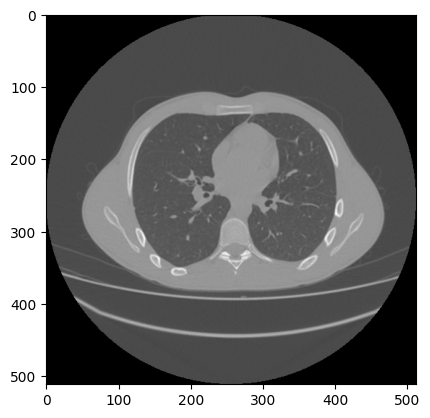

In [78]:
mean_slice = data_preproc(data, output_type)
print(mean_slice.shape) # --> (Depth, W, H, Channels)

plt.imshow(mean_slice, cmap="grey")

In [79]:
data, files, output_type = data_execute(FOLDER_PATH5, return_files=True)

In [80]:
data[:2]

[array([[[-2048., -2048., -2048., ..., -2048., -2048., -2048.],
         [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
         [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
         ...,
         [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
         [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
         [-2048., -2048., -2048., ..., -2048., -2048., -2048.]],
 
        [[-2048., -2048., -2048., ..., -2048., -2048., -2048.],
         [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
         [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
         ...,
         [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
         [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
         [-2048., -2048., -2048., ..., -2048., -2048., -2048.]],
 
        [[-2048., -2048., -2048., ..., -2048., -2048., -2048.],
         [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
         [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
      

In [81]:
files[:2]

[WindowsPath('D:/AI/datasets/COVID19_1110/COVID19_1110/studies/CT-4/study_1109.nii.gz'),
 WindowsPath('D:/AI/datasets/COVID19_1110/COVID19_1110/studies/CT-4/study_1110.nii.gz')]

In [82]:
output_type

'volumes'

In [83]:
data2 = data_preproc(data, output_type, get_slice_num=True)
print(f"Slices index: {data2[1]}")
print(f"Slices count: {len(data2[0])}")
print(f"Slices shape: {data2[0][0].shape}")

Slices index: [18, 21]
Slices count: 2
Slices shape: (512, 512)


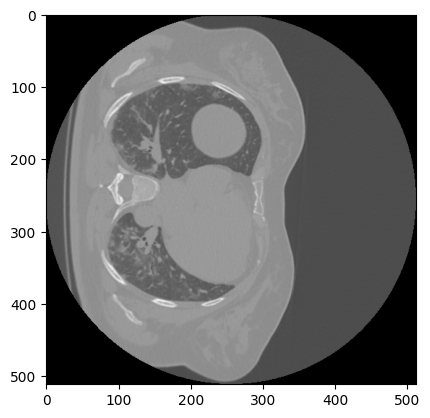

In [84]:
plt.imshow(data2[0][0], cmap="grey")

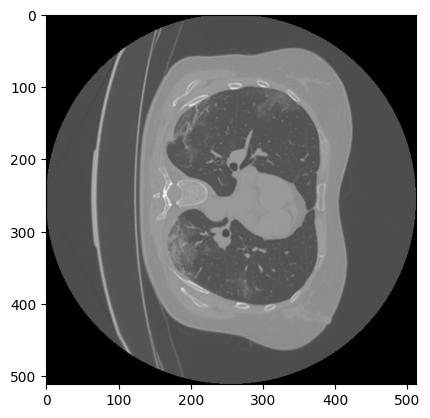

In [85]:
plt.imshow(data2[0][1], cmap="grey")

# Укладывание данные по массивам и их маркировка

In [8]:
DS1_PATH = r'D:\AI\datasets\archive\dicom_dir'
slices = []
y = []

for filename in os.listdir(DS1_PATH):
    if filename.endswith(".dcm"):
        filepath = os.path.join(DS1_PATH, filename)
        ds = pdc.dcmread(filepath)

        if hasattr(ds, 'Modality') and ds.Modality == 'CT':
            label = 0  # Значение по умолчанию
            if 'contrast_1' in filename.lower():
                label = 1
                slices.append(ds.pixel_array)
                y.append(label)
            elif 'contrast_0' in filename.lower(): # норма обнуляется
                label = 0
                slices.append(ds.pixel_array)
                y.append(label)

X_all = np.array(slices)
y_all = np.array(y)

1


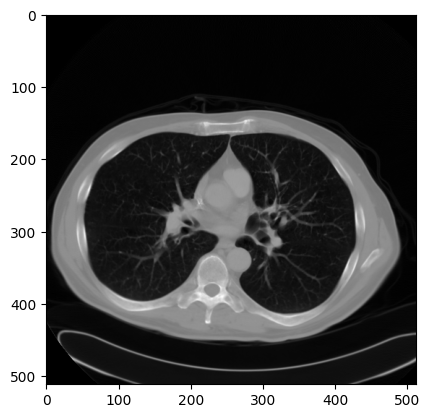

In [9]:
print(y_all[0])
plt.imshow(X_all[0], cmap="grey")

1


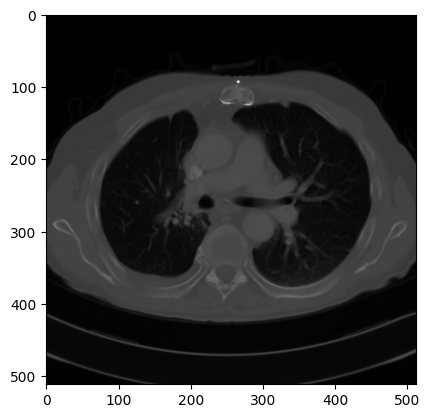

In [10]:
print(y_all[1])
plt.imshow(X_all[1], cmap="grey")

In [11]:
ds_img_1 = X_all[0]
ds_img_2 = X_all[1]


# Диапазон значений пикселей
print("Минимальное значение изображения №1:", np.min(ds_img_1))
print("Максимальное значение изображения №1:", np.max(ds_img_1))

print("Минимальное значение изображения №2:", np.min(ds_img_2))
print("Максимальное значение изображения №2:", np.max(ds_img_2))

Минимальное значение изображения №1: 0
Максимальное значение изображения №1: 1918
Минимальное значение изображения №2: 0
Максимальное значение изображения №2: 4089


# Создание и предобработка датасетов

Масштабирование, создание массива данных {фото, указание учителя} и разделение на выборки

In [ ]:
import cv2
import torch

def preproc_img(imgs, size=(128, 128)):
  # imgs_np = np.array([cv2.resize(img, size) for img in imgs])
  imgs_np = imgs.astype(np.float32)
  imgs_np /= np.max(imgs_np)

  if imgs_np.ndim == 3:
      imgs_np = imgs_np[..., np.newaxis]
  return imgs_np

Разделение данных и меток в отдельные переменные и нормализация

In [ ]:
from sklearn.model_selection import train_test_split

X_all = preproc_img(X_all)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, stratify=y_all)

X_train = torch.tensor(X_train).permute(0, 1, 2, 3).float()
X_test= torch.tensor(X_test).permute(0, 1, 2, 3).float()

y_train = torch.tensor(y_train).long()
y_test= torch.tensor(y_test).long()

# Создание модели, её компиляция и обучение

Обучение нейронной сети

In [ ]:
# создание модели
INPUT_SHAPE = tuple(X_train.shape[1:])
print("Input dimensions: ", INPUT_SHAPE) # размер входа

model = Sequential([
    keras.Input(shape=INPUT_SHAPE),

    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Dropout(0.2),

    layers.GlobalAveragePooling2D(),

    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# компиляция модели
model.compile( optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
	metrics=['accuracy'])

# вывод структуры модели
model.summary()

Input dimensions:  (512, 512, 1)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 512, 512, 8)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 256, 256, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,010 (27.38 KB)

 Trainable params: 7,010 (27.38 KB)

 Non-trainable params: 0 (0.00 B)

Визуализация результатов

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',   # метрика, за которой следим
    patience=5,           # количество эпох без улучшения, после которых остановка
    restore_best_weights=True  # вернуть веса лучшей эпохи
)

In [ ]:
EPOCHS = 25
BATCH = 32
# обучаем модель
history = model.fit(X_train, # примеры входа
                    y_train, # указания учителя
                    batch_size = BATCH, # размер пакета
                    epochs = EPOCHS, # количество эпох
                    callbacks=[early_stop],
                    validation_data=(X_test, y_test)) #  данные для проверки

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.5702 - loss: 0.6897 - val_accuracy: 0.8000 - val_loss: 0.6831
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.5923 - loss: 0.6879 - val_accuracy: 0.8000 - val_loss: 0.6810
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6073 - loss: 0.6877 - val_accuracy: 0.8667 - val_loss: 0.6776
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6307 - loss: 0.6871 - val_accuracy: 0.5667 - val_loss: 0.6745
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6275 - loss: 0.6834 - val_accuracy: 0.5333 - val_loss: 0.6721
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5819 - loss: 0.6841 - val_accuracy: 0.5333 - val_loss: 0.6710
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5702 - loss: 0.6885 - val_accuracy: 0.5667 - val_loss: 0.6702
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5773 - loss: 0.6862 - val_accuracy: 0.8333 - val_loss: 0.667

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0) # проверяем на обучаюхих данных
loss1, accuracy1 = model.evaluate(X_test, y_test, verbose=0) # проверяем на тестовых данных
print('Train accuracy:', round(accuracy, 4))
print('Test accuracy:', round(accuracy1, 4))
print('Train loss:', round(loss, 4))
print('Test loss:', round(loss1, 4))
y_pred = model.predict(X_train)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

Train accuracy: 0.6143
Test accuracy: 0.8333
Train loss: 0.6609
Test loss: 0.6327
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step


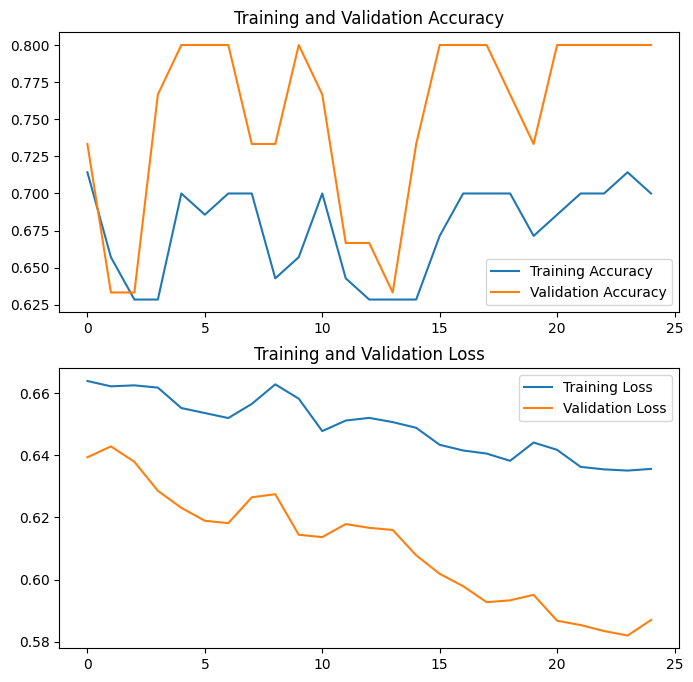

In [ ]:
# visualize training and validation results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Сохранение архитектуры модели (файл .h5)

In [ ]:
model.save("meanCT_model.keras")